# 1. Library

In [2]:
import pandas as pd
import numpy as np
#import pandas_profiling

# library untuk eksplorasi data
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 2. Data

In [4]:
df_label = pd.read_csv('csv/data/train.csv')

In [6]:
df_nolabel = pd.read_csv('csv/data/test.csv')
df_meal_info = pd.read_csv('csv/data/meal_info.csv')
df_fulfilment_center_info = pd.read_csv('csv/data/fulfilment_center_info.csv')

In [7]:
df_label.head() 
df_nolabel.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [8]:
df_meal_info.head()
df_fulfilment_center_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [9]:
print('meal info shape',df_meal_info.shape)
print('df fulfilment center info shape',df_fulfilment_center_info.shape)

meal info shape (51, 3)
df fulfilment center info shape (77, 5)


In [10]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [9]:
df_nolabel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


# 3. Data Preparation

1. Merging
1. EDA
1. Feature Engineering

> ## Merging

In [11]:
df_label_merge0 = pd.merge(df_label, df_fulfilment_center_info, on = 'center_id', how = 'left')
df_label_merge = pd.merge(df_label_merge0, df_meal_info, on = 'meal_id', how = 'left')

In [12]:
df_nolabel_merge0 = pd.merge(df_nolabel, df_fulfilment_center_info, on = 'center_id', how = 'left')
df_nolabel_merge = pd.merge(df_nolabel_merge0, df_meal_info, on = 'meal_id', how = 'left')

In [13]:
df_label_merge.head(20)
df_nolabel_merge.head(20)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
5,1270037,1,55,1248,251.23,252.23,0,0,28,647,56,TYPE_C,2.0,Beverages,Indian
6,1191377,1,55,1778,183.36,184.36,0,0,190,647,56,TYPE_C,2.0,Beverages,Italian
7,1499955,1,55,1062,182.36,183.36,0,0,391,647,56,TYPE_C,2.0,Beverages,Italian
8,1025244,1,55,2707,193.06,192.06,0,0,472,647,56,TYPE_C,2.0,Beverages,Italian
9,1054194,1,55,1207,325.92,384.18,0,1,676,647,56,TYPE_C,2.0,Beverages,Continental


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian
5,1284113,146,55,1778,190.15,190.15,0,0,647,56,TYPE_C,2.0,Beverages,Italian
6,1197966,146,55,1062,191.09,192.09,0,0,647,56,TYPE_C,2.0,Beverages,Italian
7,1132739,146,55,2707,242.56,240.56,0,0,647,56,TYPE_C,2.0,Beverages,Italian
8,1057981,146,55,1207,360.90,360.90,0,0,647,56,TYPE_C,2.0,Beverages,Continental
9,1095932,146,55,1230,383.18,384.18,0,0,647,56,TYPE_C,2.0,Beverages,Continental


> ## EDA

In [14]:
df_label_merge.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

<div class="alert alert-block alert-info">
    <b>Centers and Meals</b>
</div>

In [15]:
print('number of weeks :',len(df_label['week'].unique()))
print('number of centers :',len(df_label['center_id'].unique()))
print('number of meals should be distributed:',len(df_label['meal_id'].unique()))

number of weeks : 145
number of centers : 77
number of meals should be distributed: 51


In [16]:
print('number of rows if all balance:',145*77*51)

number of rows if all balance: 569415


In [17]:
print('number of rows :',df_label.shape[0])

number of rows : 456548


In [18]:
df_label[['week','center_id','meal_id','num_orders']].head(20)
df_label[['week','center_id','meal_id','num_orders']].tail(20)

,week,center_id,meal_id,num_orders
0,1,55,1885,177
1,1,55,1993,270
2,1,55,2539,189
3,1,55,2139,54
4,1,55,2631,40
5,1,55,1248,28
6,1,55,1778,190
7,1,55,1062,391
8,1,55,2707,472
9,1,55,1207,676


,week,center_id,meal_id,num_orders
456528,145,61,1216,54
456529,145,61,2126,54
456530,145,61,2826,270
456531,145,61,1754,540
456532,145,61,1971,256
456533,145,61,1902,69
456534,145,61,1247,26
456535,145,61,1558,162
456536,145,61,2581,176
456537,145,61,1962,256


In [19]:
orders_per_center = df_label[['center_id','num_orders']].groupby('center_id').sum().sort_values('num_orders',ascending=False)
orders_per_meal = df_label[['meal_id','num_orders']].groupby('meal_id').sum().sort_values('num_orders',ascending=False)

In [20]:
orders_per_center.head()
orders_per_center.tail()

,num_orders
center_id,
13,4296545
43,3920294
10,3381018
52,3125835
137,3117478


,num_orders
center_id,
74,691044
162,680255
149,637527
41,497338
91,425160


In [21]:
orders_per_meal.head()
orders_per_meal.tail()

,num_orders
meal_id,
2290,9770303
1885,8346246
1754,6818059
1993,6656856
1109,6367773


,num_orders
meal_id,
1847,277635
1247,231897
1902,209242
1770,190709
2104,159957


<div class="alert alert-block alert-info">
    <b>Target Variable</b>
</div>

In [22]:
df_label['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

(array([2.22775e+05, 8.52830e+04, 5.35360e+04, 3.03530e+04, 1.98510e+04,
        1.22050e+04, 8.76700e+03, 5.56200e+03, 4.00500e+03, 2.94400e+03,
        2.12000e+03, 1.65400e+03, 1.24500e+03, 1.06300e+03, 8.28000e+02,
        6.71000e+02, 5.73000e+02, 4.42000e+02, 3.36000e+02, 2.98000e+02,
        2.67000e+02, 2.11000e+02, 1.60000e+02, 1.68000e+02, 1.32000e+02,
        1.14000e+02, 8.50000e+01, 9.30000e+01, 7.30000e+01, 6.80000e+01,
        6.10000e+01, 5.90000e+01, 5.20000e+01, 3.70000e+01, 3.90000e+01,
        2.80000e+01, 2.70000e+01, 2.90000e+01, 2.70000e+01, 2.50000e+01,
        1.80000e+01, 1.50000e+01, 1.30000e+01, 1.40000e+01, 1.40000e+01,
        1.70000e+01, 1.30000e+01, 1.00000e+01, 1.10000e+01, 8.00000e+00,
        1.00000e+01, 4.00000e+00, 8.00000e+00, 1.10000e+01, 1.10000e+01,
        8.00000e+00, 5.00000e+00, 4.00000e+00, 1.10000e+01, 3.00000e+00,
        1.00000e+00, 0.00000e+00, 4.00000e+00, 6.00000e+00, 5.00000e+00,
        3.00000e+00, 4.00000e+00, 2.00000e+00, 1.00

(0, 2000)

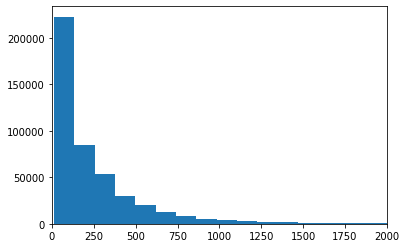

In [23]:
plt.hist(df_label['num_orders'],bins=200)

plt.xlim(0,2000)
plt.show()

In [24]:
agg_week = df_label_merge[['week','num_orders']].groupby('week').sum()

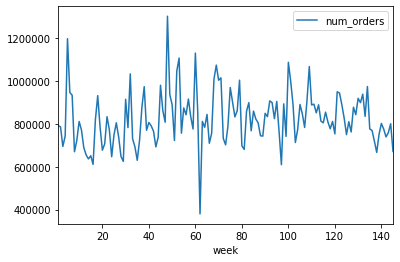

In [25]:
agg_week.plot()

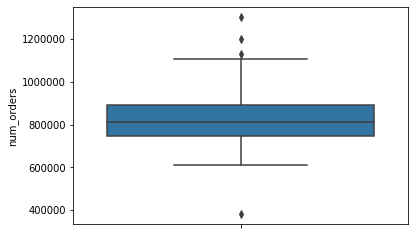

In [26]:
sns.boxplot(y=agg_week['num_orders'])

In [27]:
agg_week.sort_values('num_orders').head()
agg_week.sort_values('num_orders').tail()

,num_orders
week,
62,380065
97,609977
16,611515
29,625414
35,630458


,num_orders
week,
100,1088162
53,1108236
60,1131459
5,1198675
48,1303457


<div class="alert alert-block alert-info">
    <b>Correlation Matrics</b>
</div>

In [28]:
feature = ['checkout_price','base_price','emailer_for_promotion', 'homepage_featured','op_area','num_orders']
correlation_matrics = df_label_merge[feature].corr(method='spearman')

In [29]:
correlation_matrics

,checkout_price,base_price,emailer_for_promotion,homepage_featured,op_area,num_orders
checkout_price,1.000000,0.956968,0.015693,-0.058223,0.023115,-0.388101
base_price,0.956968,1.000000,0.150075,0.038812,0.019188,-0.343826
emailer_for_promotion,0.015693,0.150075,1.000000,0.390534,-0.016370,0.211809
homepage_featured,-0.058223,0.038812,0.390534,1.000000,0.037481,0.232832
op_area,0.023115,0.019188,-0.016370,0.037481,1.000000,0.175918
num_orders,-0.388101,-0.343826,0.211809,0.232832,0.175918,1.000000


<Figure size 720x576 with 0 Axes>

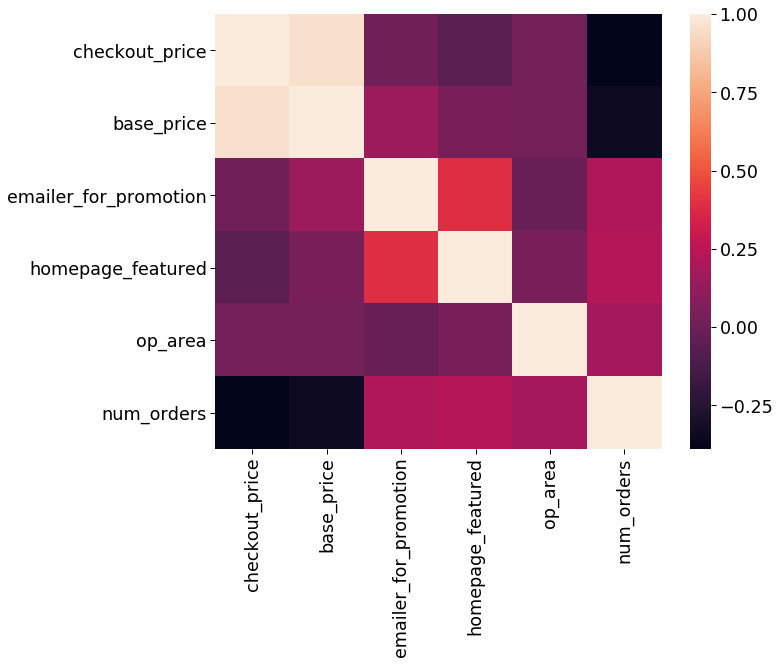

In [30]:
# image size
plt.figure(figsize = (10,8))

# text scaling
sns.set_context("paper", font_scale=2)

sns.heatmap(correlation_matrics)

<div class="alert alert-block alert-info">
    <b>Food Category and Food cuisine</b>
</div>

In [31]:
agg_category = df_label_merge[['category','num_orders']].groupby('category').sum()
agg_cuisine = df_label_merge[['cuisine','num_orders']].groupby('cuisine').sum()

In [31]:
sns.set_context("paper", font_scale=2)

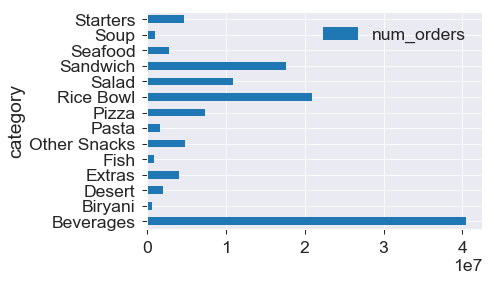

In [32]:
agg_category.plot(kind='barh')
plt.show()

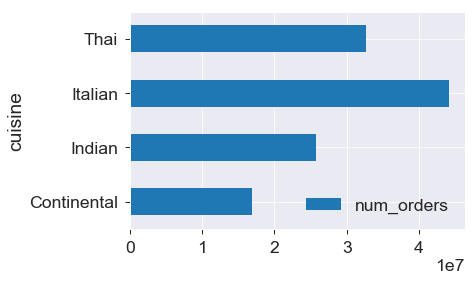

In [33]:
agg_cuisine.plot(kind='barh')
plt.show()

<div class="alert alert-block alert-danger">
    <b>How about variable from fulfilment center: region and center type</b>???
</div>

# 4. Modeling Process

<div class="alert alert-block alert-info">
    <b>Data Preparation</b>
</div>

In [36]:
cat_var = [
    'region_code', 'center_type', 'category', 'cuisine'
]

num_var = [
    'checkout_price', 'emailer_for_promotion', 'homepage_featured', 'op_area' 
]

In [37]:
df_nolabel_merge['num_orders'] = -1
df_full = df_label_merge.append(df_nolabel_merge)

C:\Users\Schema.id\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [38]:
df_full = pd.get_dummies(df_full,columns = cat_var)

In [39]:
df_nolabel_merge = df_full[df_full['num_orders'] == -1]
df_label_merge = df_full[df_full['num_orders'] != -1]

In [40]:
list(df_full)[:]

['base_price',
 'center_id',
 'checkout_price',
 'city_code',
 'emailer_for_promotion',
 'homepage_featured',
 'id',
 'meal_id',
 'num_orders',
 'op_area',
 'week',
 'region_code_23',
 'region_code_34',
 'region_code_35',
 'region_code_56',
 'region_code_71',
 'region_code_77',
 'region_code_85',
 'region_code_93',
 'center_type_TYPE_A',
 'center_type_TYPE_B',
 'center_type_TYPE_C',
 'category_Beverages',
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters',
 'cuisine_Continental',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai']

In [41]:
add_var = list(df_nolabel_merge)[11:]

In [42]:
add_var
num_var

['region_code_23',
 'region_code_34',
 'region_code_35',
 'region_code_56',
 'region_code_71',
 'region_code_77',
 'region_code_85',
 'region_code_93',
 'center_type_TYPE_A',
 'center_type_TYPE_B',
 'center_type_TYPE_C',
 'category_Beverages',
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters',
 'cuisine_Continental',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai']

['checkout_price', 'emailer_for_promotion', 'homepage_featured', 'op_area']

In [43]:
X = df_label_merge[num_var + add_var]
y = df_label_merge['num_orders']
X_pred = df_nolabel_merge[num_var + add_var]

1. Train Test
1. Metrics
1. model 
1. submission

<div class="alert alert-block alert-info">
    <b>Train Test Split</b>
</div>

In [44]:
# Split Data Train Test 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

<div class="alert alert-block alert-info">
    <b>Model: XGBoost</b>
</div>

In [45]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [46]:
rexgb = XGBRegressor(learning_rate=0.1,
                    n_estimators=40, 
                    min_child_weight=3,
                    max_depth=5,
                    gamma=0.1,
                    subample=0.8,
                    colsample_bytree=0.6,
                    reg_alpha=0.1,
                    reg_lambda=0.1,
                    random_state=10,
                    objective ='reg:squarederror')

In [47]:
rexgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=None, n_estimators=40,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=10, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1,
             seed=None, silent=None, subample=0.8, subsample=1, verbosity=1)

In [48]:
def feature_importance_df(model,FITUR,k,scale):
    sns.set_context("paper", font_scale=scale)
    fitur_imp=pd.DataFrame({'fitur':FITUR,'importances':model.feature_importances_})
    fitur_imp.sort_values(by='importances',ascending=False,inplace=True)
    sns.barplot(x='importances',y='fitur',data=fitur_imp[0:k])
    plt.xlabel("Feature Importances")
    plt.ylabel("Feature")
    plt.show()

<Figure size 720x720 with 0 Axes>

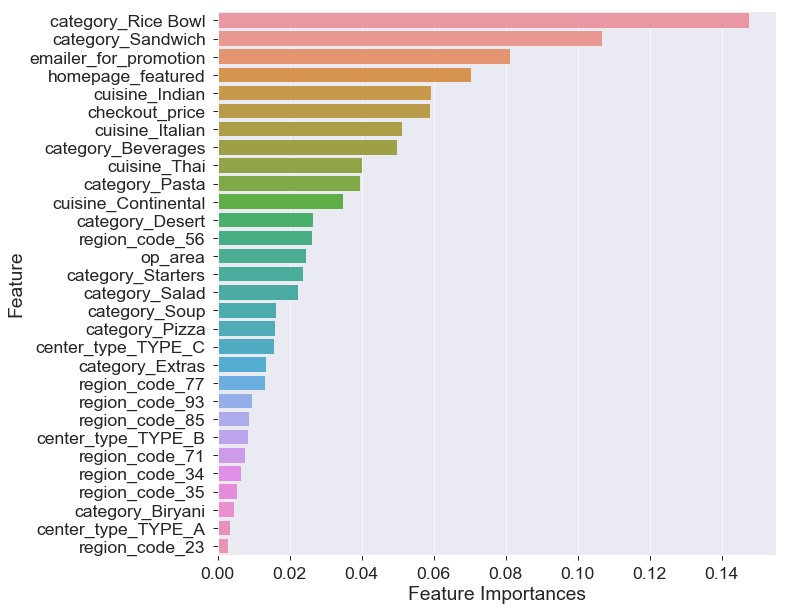

In [49]:
plt.figure(figsize=(10,10))
feature_importance_df(rexgb,list(X),30,2)

<div class="alert alert-block alert-info">
    <b>Evaluation</b>
</div>

Evaluation metrics: mean squared log error

In [50]:
y_pred = rexgb.predict(X_test)

In [51]:
y_pred = y_pred - np.min(y_pred) + 1

In [52]:
from sklearn.metrics import mean_squared_log_error

In [53]:
print('mean squared log error(msle):',mean_squared_log_error(y_test - np.min(y_pred) + 1,y_pred))

mean squared log error(msle): 0.9656923


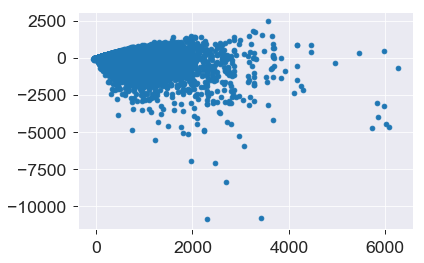

In [54]:
resi = rexgb.predict(X_test)-y_test
plt.scatter(rexgb.predict(X_test),resi)
plt.show()

In [55]:
def eval(alg,y_train,y_test):
    alg.fit(X_train,y_train)
    
    y_pred = alg.predict(X_test)
    y_pred = y_pred - np.min(y_pred) + 1
    y_test = y_test - np.min(y_pred) + 1
    
    y_pred_train = alg.predict(X_train)
    y_pred_train = y_pred_train - np.min(y_pred_train) + 1
    y_train = y_train - np.min(y_pred_train) + 1
    
    print("msle test: \n",mean_squared_log_error(y_test,y_pred),'\n')
    print("msle train: \n",mean_squared_log_error(y_train,y_pred_train),'\n')

    resi=alg.predict(X_test)-y_test
    plt.scatter(alg.predict(X_test),resi)
    plt.show()

msle test: 
 0.9656923 

msle train: 
 0.9720185 



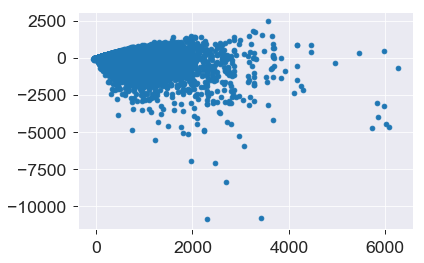

In [56]:
eval(rexgb,y_train,y_test)

<div class="alert alert-block alert-danger">
    <b>Try Some Model and Evaluate it</b>?
</div>

metrics : msle

method : 5-fold-cv

models:
1. linear regression
1. decision tree regression
1. random forest regression

# 5. Prediction

<div class="alert alert-block alert-danger">
    <b>show the result of prediction at center 61 week 146</b>!
</div>